In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [5]:
df = pd.read_csv("../Data/seoul_2.csv")
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id
0,종로구,2013,30007,873,9,1.0
1,종로구,2014,27484,905,9,1.0
2,종로구,2015,27470,906,9,1.0
3,종로구,2016,26386,846,9,1.0
4,종로구,2017,25814,689,9,1.0


## RandomForestRegressor

In [7]:
from sklearn.cluster import KMeans

# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수']

df_temp = df.copy()

data_points = df[target_col].values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df['cluster_id'] = km.labels_

# Feature, Target
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수']
data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

# -----------------------------
df['cluster_id'] = df['cluster_id'] + 10
df_temp = df.sort_values(by='전출인구', ascending=True)
temp_list = df_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df['cluster_id'][df['cluster_id'] == temp] = i
    i-=1
df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
df['cluster_id'].unique()

# -----------------------------
# Feature, Target
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수']
data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(train_input, train_target)

print("Train score :", rf.score(test_input, test_target))

Train score : 0.9999701460583829


In [8]:
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id
0,종로구,2013,30007,873,9,1.0
1,종로구,2014,27484,905,9,1.0
2,종로구,2015,27470,906,9,1.0
3,종로구,2016,26386,846,9,1.0
4,종로구,2017,25814,689,9,1.0


In [9]:
pred_cluster = []

for i in range(len(df)):
    # pred_cluster.append(rf.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7], df.iloc[i,8], df.iloc[i,9]]]))
    pred_cluster.append(rf.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4]]]))

df['pred_cluster'] = pred_cluster
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,1.00,[1.0]
1,종로구,2014,27484,905,9,1.00,[1.0]
2,종로구,2015,27470,906,9,1.00,[1.0]
3,종로구,2016,26386,846,9,1.00,[1.0]
4,종로구,2017,25814,689,9,1.00,[1.0]
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,0.00,[0.003299999999999998]
221,강동구,2018,68933,2659,17,0.33,[0.3299999999999991]
222,강동구,2019,67292,2437,17,0.33,[0.3299999999999991]
223,강동구,2020,78271,2535,17,0.33,[0.3299999999999991]


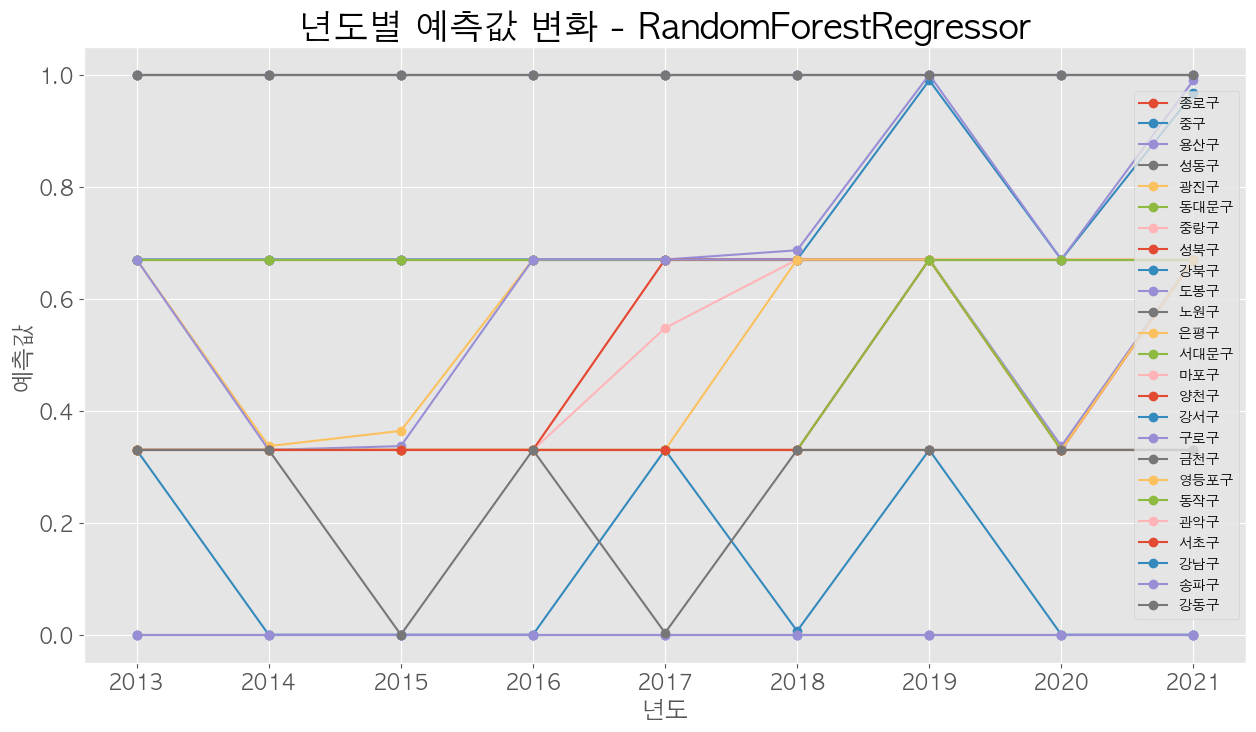

In [10]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

gungu = df["시군구"].unique()
years = list(range(2013, 2022))
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black','black']
colors = 'rainbow'

for i in range(len(gungu)):
    
    ax.plot(
        years,
        df[df['시군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
        # color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
# ax.set_xlim(2012, 2022)
# ax.set_ylim(0.75, 1.05)
ax.set_title('년도별 예측값 변화 - RandomForestRegressor', size=25)
ax.set_ylabel('예측값', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('년도', fontsize=17)
# ax.set_xticklabels([0, 2013, 2015, 2017, 2019, 2021], rotation=0, fontsize=15)

plt.show()

## Linear Regression

In [12]:
df = pd.read_csv("../Data/seoul_2.csv")
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id
0,종로구,2013,30007,873,9,1.0
1,종로구,2014,27484,905,9,1.0
2,종로구,2015,27470,906,9,1.0
3,종로구,2016,26386,846,9,1.0
4,종로구,2017,25814,689,9,1.0


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.9027994501703622


In [14]:
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id
0,종로구,2013,30007,873,9,1.00
1,종로구,2014,27484,905,9,1.00
2,종로구,2015,27470,906,9,1.00
3,종로구,2016,26386,846,9,1.00
4,종로구,2017,25814,689,9,1.00
...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,0.00
221,강동구,2018,68933,2659,17,0.33
222,강동구,2019,67292,2437,17,0.33
223,강동구,2020,78271,2535,17,0.33


In [15]:
pred_cluster = []

for i in range(len(df)):
    # pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7], df.iloc[i,8], df.iloc[i,9]]]))
    pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4]]]))

df['pred_cluster'] = pred_cluster
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,1.00,[0.9657709476872418]
1,종로구,2014,27484,905,9,1.00,[0.9995539336036063]
2,종로구,2015,27470,906,9,1.00,[0.9997391231633834]
3,종로구,2016,26386,846,9,1.00,[1.0144574913052957]
4,종로구,2017,25814,689,9,1.00,[1.0225700404972364]
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,0.00,[0.1490187431061114]
221,강동구,2018,68933,2659,17,0.33,[0.4430880628849886]
222,강동구,2019,67292,2437,17,0.33,[0.4657314086128195]
223,강동구,2020,78271,2535,17,0.33,[0.31806754259716485]


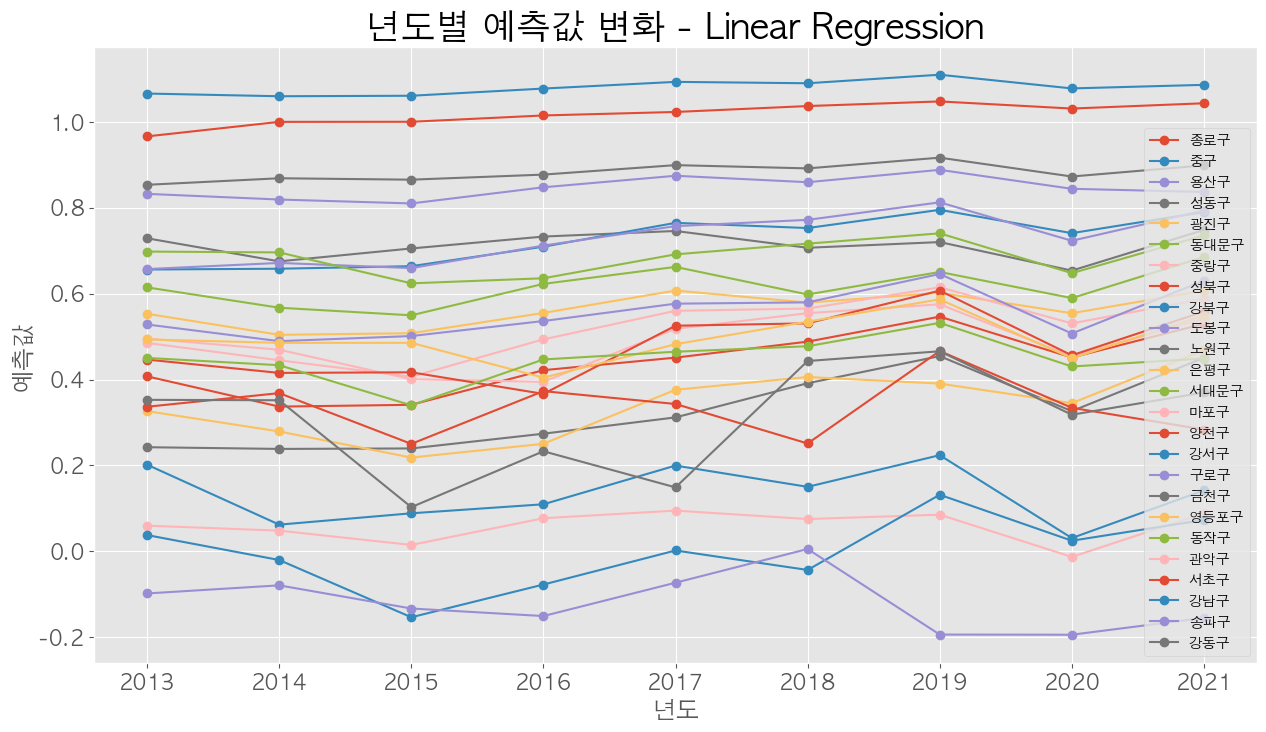

In [16]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

gungu = df["시군구"].unique()
# years = list(range(9))
years = list(range(2013, 2022))
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']
colors = 'rainbow'

for i in range(len(gungu)):
    
    ax.plot(
        years,
        df[df['시군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
        # color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
# ax.set_xlim(-0.5, 9)
# ax.set_ylim(0.75, 1.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - Linear Regression', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)
# ax.set_xticklabels(rotation=15, fontsize=15)
# ax.set_yticklabels([0.75, 0.80, 0.85, 0.9, 0.95, 1.00, 1.05], fontsize=15)

plt.show()

### Save Data

In [19]:
df.to_csv("../Data/seoul_3.csv", index=False)

----
## Save Model

In [17]:
# 모델 저장하기
import joblib
filename = "../Data/lr_seoul_2.h5"
joblib.dump(lr, filename)

['../Data/lr_seoul_2.h5']